In [1]:
import numpy as np
import pandas as pd

In [2]:
def create_asset_data(tickers, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = []
    for ticker in tickers:
        np.random.seed(42)  # For reproducibility
        price = np.random.randn(len(dates)).cumsum() + 100
        for i in range(len(dates)):
            open_price = price[i] + np.random.uniform(-1, 1)
            high_price = max(open_price, price[i] + np.random.uniform(0, 2))
            low_price = min(open_price, price[i] - np.random.uniform(0, 2))
            close_price = price[i] + np.random.uniform(-1, 1)
            volume = np.random.randint(1000, 1000000)
            # Introduce NaN values randomly
            if np.random.rand() < 0.05:
                open_price = np.nan
            if np.random.rand() < 0.05:
                high_price = np.nan
            if np.random.rand() < 0.05:
                low_price = np.nan
            if np.random.rand() < 0.05:
                close_price = np.nan
            if np.random.rand() < 0.05:
                volume = np.nan
            data.append([dates[i], ticker, open_price, high_price, low_price, close_price, volume])
    return pd.DataFrame(data, columns=['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Define tickers for each asset type
stock_tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
forex_tickers = ['EUR/USD', 'GBP/USD', 'USD/JPY', 'AUD/USD', 'USD/CAD']
crypto_tickers = ['BTC/USD', 'ETH/USD', 'XRP/USD', 'LTC/USD', 'BCH/USD']

# Generate data for each asset type
stock_data = create_asset_data(stock_tickers, '2015-01-01', '2023-01-01')
forex_data = create_asset_data(forex_tickers, '2015-01-01', '2023-01-01')
crypto_data = create_asset_data(crypto_tickers, '2015-01-01', '2023-01-01')

# Combine all data into a single DataFrame
combined_data = pd.concat([stock_data, forex_data, crypto_data])

# Introduce duplicate rows
combined_data = pd.concat([combined_data, combined_data.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
combined_data.to_csv('files/algotrading_combined_dataset2.csv', index=False)

print("Dataset created and saved to 'algotrading_combined_dataset2.csv'")

Dataset created and saved to 'algotrading_combined_dataset2.csv'


In [3]:
algo_df = pd.read_csv('files/algotrading_combined_dataset2.csv')
funda_df = pd.read_csv("files/fundamental_research_dataset_large.csv")

In [4]:
print(algo_df.head())
print(algo_df.shape)

         Date Ticker        Open        High         Low       Close    Volume
0  2015-01-01   AAPL  101.031849  101.329723   98.852354  101.197410  344567.0
1  2015-01-02   AAPL  100.866496  100.866496   99.568981  101.220064  310521.0
2  2015-01-05   AAPL  101.164489  101.176821  100.920124  101.339872       NaN
3  2015-01-06   AAPL         NaN  103.203859  102.287356  101.777905  295025.0
4  2015-01-07   AAPL  102.744728  104.050309  102.211701  102.090310  439080.0
(32870, 7)


In [5]:
# print(funda_df[funda_df["Ticker"] == "AAPL"])
print(funda_df.head(3))
print(funda_df.shape)

  Ticker           Company Name      Sector             Industry  \
0   AAPL             Apple Inc.  Technology       Semiconductors   
1  GOOGL          Alphabet Inc.     Finance  Investment Services   
2   MSFT  Microsoft Corporation     Finance                Banks   

   Market Cap (B)   EPS  P/E Ratio  Dividend Yield (%)  P/B Ratio  D/E Ratio  
0          458.13 -9.78      44.16                2.19       9.17       2.56  
1          215.85  4.86      27.56                8.14      14.93       0.06  
2          276.46  5.09       6.73                0.27       1.76       1.31  
(1050, 10)


1. Identify all the top performing stocks based on their overall return from the start to the end of the dataset

In [7]:
print(algo_df["Ticker"].nunique())
print(algo_df["Ticker"].unique())
print(algo_df["Ticker"].value_counts())

15
['AAPL' 'GOOG' 'MSFT' 'AMZN' 'TSLA' 'EUR/USD' 'GBP/USD' 'USD/JPY'
 'AUD/USD' 'USD/CAD' 'BTC/USD' 'ETH/USD' 'XRP/USD' 'LTC/USD' 'BCH/USD']
Ticker
XRP/USD    2213
GOOG       2203
AMZN       2202
ETH/USD    2201
USD/JPY    2199
TSLA       2192
GBP/USD    2191
LTC/USD    2190
BCH/USD    2189
AUD/USD    2185
BTC/USD    2185
MSFT       2184
AAPL       2180
EUR/USD    2179
USD/CAD    2177
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Ticker
USD/JPY    82.54
USD/CAD    82.28
XRP/USD    81.03
AUD/USD    78.99
TSLA       77.31
ETH/USD    62.77
GBP/USD    62.61
EUR/USD    45.17
LTC/USD     3.39
AAPL        2.72
MSFT       -3.48
AMZN       -3.67
BCH/USD    -5.85
BTC/USD    -7.94
GOOG       -8.44
Name: Overall Return (%), dtype: float64


<Axes: xlabel='Ticker'>

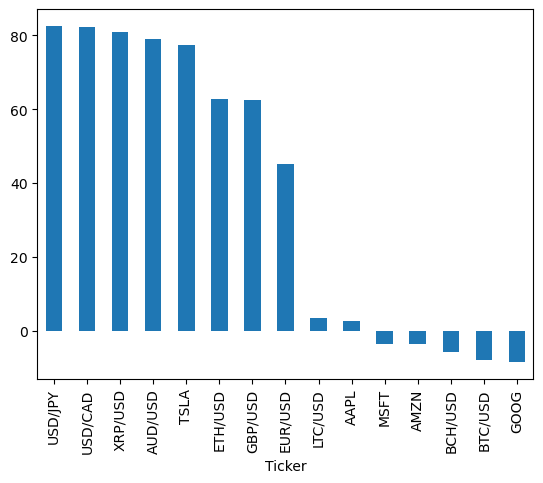

In [8]:
tickers = algo_df["Ticker"].unique()
performance = []

for ticker in tickers:
    stock_data = algo_df[algo_df["Ticker"] == ticker]
    stock_data.loc[:, "Close"] = stock_data["Close"].ffill()
    overall_return = round(((stock_data["Close"].iloc[-1] - stock_data["Close"].iloc[0])/stock_data["Close"].iloc[0]) * 100, 2)
    performance.append({"Ticker": ticker, "Overall Return (%)": overall_return})

stocks_performance = pd.DataFrame(performance).sort_values("Overall Return (%)", ascending=False)
stocks_performance.set_index("Ticker", inplace=True)
print(type(stocks_performance))

# Convert to series
stocks_performance = stocks_performance.squeeze()
print(type(stocks_performance))
print(stocks_performance)

stocks_performance.plot(kind="bar")

2. How many instance of daily price change greater than 5% occurred for each stock

In [10]:
print(algo_df.isnull().sum())
algo_df.ffill(inplace=True)
print(algo_df.isnull().sum())

Date         0
Ticker       0
Open      1375
High      1568
Low       1780
Close     1941
Volume    2068
dtype: int64
Date      0
Ticker    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


<Axes: xlabel='Ticker'>

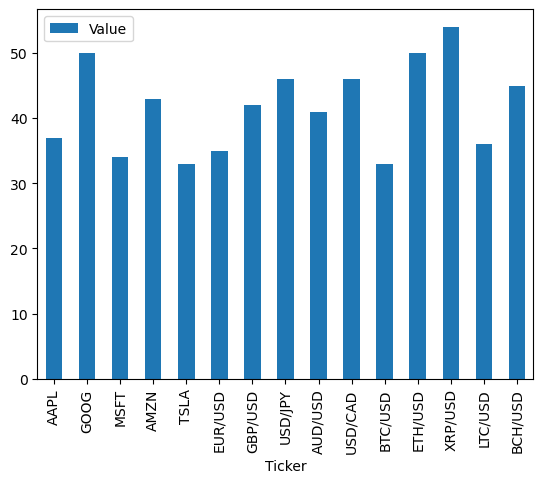

In [11]:
algo_df["Daily Change"] = algo_df['Close'].pct_change()
algo_df['High Change'] = algo_df['Daily Change'] > 0.05
algo_df
tickers = algo_df['Ticker'].unique()
occurence = {}

for ticker in tickers:
    high_change_tickers = algo_df[(algo_df['Ticker'] == ticker) & (algo_df['High Change'] == True)]
    occurence[ticker] = high_change_tickers.shape[0]

df = pd.DataFrame(list(occurence.items()),columns=["Ticker","Value"])
df.set_index('Ticker',inplace=True)
df.plot(kind='bar')

In [12]:
type(algo_df["Date"])
algo_df["Date"] = pd.to_datetime(algo_df["Date"])
print(algo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32870 entries, 0 to 32869
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          32870 non-null  datetime64[ns]
 1   Ticker        32870 non-null  object        
 2   Open          32870 non-null  float64       
 3   High          32870 non-null  float64       
 4   Low           32870 non-null  float64       
 5   Close         32870 non-null  float64       
 6   Volume        32870 non-null  float64       
 7   Daily Change  32869 non-null  float64       
 8   High Change   32870 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(6), object(1)
memory usage: 2.0+ MB
None


In [13]:
print(algo_df.head())

        Date Ticker        Open        High         Low       Close    Volume  \
0 2015-01-01   AAPL  101.031849  101.329723   98.852354  101.197410  344567.0   
1 2015-01-02   AAPL  100.866496  100.866496   99.568981  101.220064  310521.0   
2 2015-01-05   AAPL  101.164489  101.176821  100.920124  101.339872  310521.0   
3 2015-01-06   AAPL  101.164489  103.203859  102.287356  101.777905  295025.0   
4 2015-01-07   AAPL  102.744728  104.050309  102.211701  102.090310  439080.0   

   Daily Change  High Change  
0           NaN        False  
1      0.000224        False  
2      0.001184        False  
3      0.004322        False  
4      0.003069        False  


<Axes: xlabel='Ticker'>

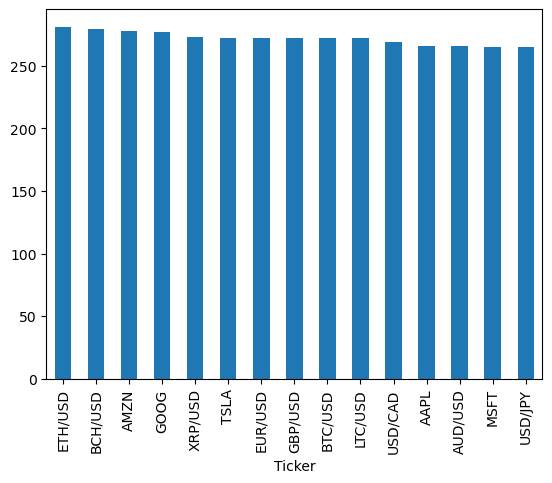

In [14]:
first_quarter = algo_df[algo_df["Date"].dt.month.isin([1,2,3])]
first_quarter = first_quarter[first_quarter["Close"] > first_quarter["Open"]]
increase_count = first_quarter["Ticker"].value_counts()
increase_count.plot(kind="bar")

4. Calculate the percentage of times the opening price being higher than the previous day's closing price resulted in a higher closing price on that day.

        Date Ticker        Open        High         Low       Close    Volume  \
0 2015-01-01   AAPL  101.031849  101.329723   98.852354  101.197410  344567.0   
1 2015-01-02   AAPL  100.866496  100.866496   99.568981  101.220064  310521.0   
2 2015-01-05   AAPL  101.164489  101.176821  100.920124  101.339872  310521.0   
3 2015-01-06   AAPL  101.164489  103.203859  102.287356  101.777905  295025.0   
4 2015-01-07   AAPL  102.744728  104.050309  102.211701  102.090310  439080.0   

   Daily Change  High Change  
0           NaN        False  
1      0.000224        False  
2      0.001184        False  
3      0.004322        False  
4      0.003069        False  


<Axes: xlabel='Ticker'>

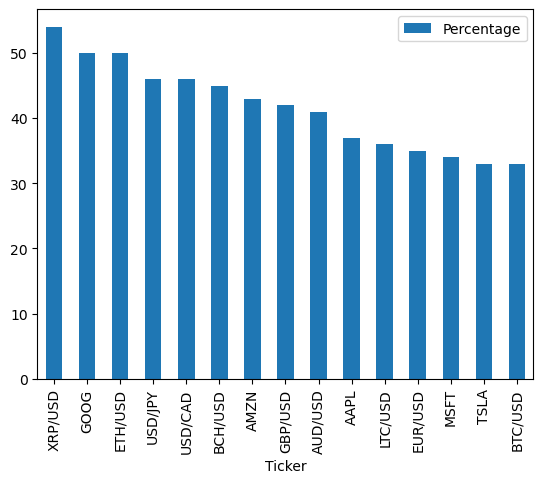

In [16]:
algo_copy = algo_df.copy()
print(algo_copy.head())

algo_copy["CurrO v PrevC"] = algo_copy["Open"] - algo_copy["Close"].shift(1)
algo_copy["CurrC v PrevC"] = algo_copy["Close"] - algo_copy["Close"].shift(1)

# tracker = {}

# algo_copy_high = algo_copy[(algo_copy["CurrO v PrevC"] > 0.0) & (algo_copy["CurrC v PrevC"] > 0.0)]
# tickers = algo_copy["Ticker"].unique()

# for ticker in tickers:
#     high_high = algo_copy_high[algo_copy_high["Ticker"] == ticker].shape[0]
#     all_vals = algo_copy[algo_copy["Ticker"] == ticker].shape[0]
#     tracker[ticker] = round((high_high/ all_vals * 100), 2)

# Boolean mask for filtering once
mask_high = (algo_copy["CurrO v PrevC"] > 0.0) & (algo_copy["CurrC v PrevC"] > 0.0)

# Add the mask as a new column to simplify grouped aggregation
algo_copy["HighHigh"] = mask_high.astype(int)

# Group and compute percentages
tracker = (
    algo_copy.groupby("Ticker")["HighHigh"]
    .agg(high_high="sum", all_vals="count")
    .assign(percentage=lambda df: round(df["high_high"] / df["all_vals"] * 100, 2))
    .to_dict()["percentage"]
)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(occurence, orient="index", columns=["Percentage"])

# Set the index name for clarity
df.index.name = "Ticker"

# Sort by percentage (optional, improves readability in the plot)
df = df.sort_values("Percentage", ascending=False)

df.plot(kind='bar')

5. Identify all assets with a daily percentage change higher than 8% and a volume greater than 100,000.

        Date Ticker        Open        High         Low       Close    Volume  \
0 2015-01-01   AAPL  101.031849  101.329723   98.852354  101.197410  344567.0   
1 2015-01-02   AAPL  100.866496  100.866496   99.568981  101.220064  310521.0   
2 2015-01-05   AAPL  101.164489  101.176821  100.920124  101.339872  310521.0   
3 2015-01-06   AAPL  101.164489  103.203859  102.287356  101.777905  295025.0   
4 2015-01-07   AAPL  102.744728  104.050309  102.211701  102.090310  439080.0   

   Daily Change  High Change  
0           NaN        False  
1      0.000224        False  
2      0.001184        False  
3      0.004322        False  
4      0.003069        False  


<Axes: xlabel='Ticker'>

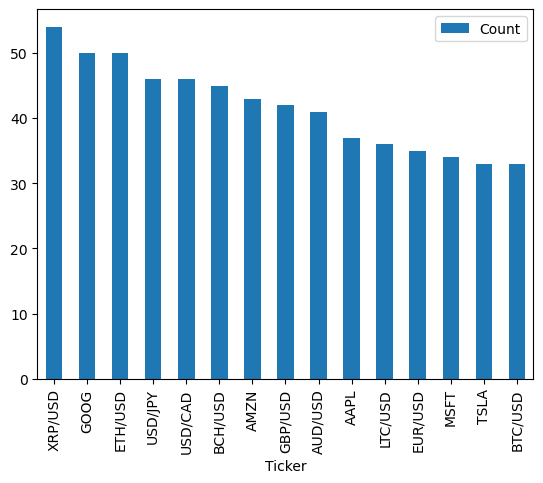

In [18]:
algo_copy = algo_df.copy()
print(algo_copy.head())

occurrence = {}

for ticker in tickers:
    high_change_tickers = algo_copy[(algo_copy['Ticker'] == ticker) & (algo_copy['Daily Change'] > 0.08) & (algo_copy["Volume"] > 100000)]
    occurrence[ticker] = high_change_tickers.shape[0]

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(occurence, orient="index", columns=["Count"])

# Set the index name for clarity
df.index.name = "Ticker"

df = df.sort_values("Count", ascending=False)

df.plot(kind='bar')

6. Identify all stocks in the Technology sector with a daily percentage change higher than 7.5%.

{'AAPL': 38, 'MSFT': 0, 'AMZN': 0, 'TSLA': 0}


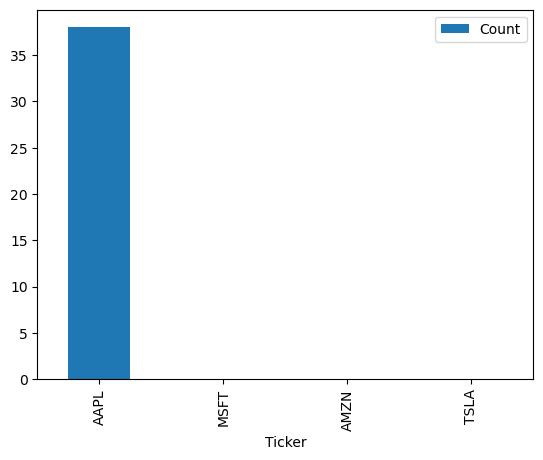

In [20]:
# Forward fill all nan
funda_df.ffill(inplace=True)

algo_df.drop(["Daily Change", "High Change"], axis = 1, inplace=True)

merged_df = pd.merge(algo_df, funda_df, on="Ticker", how="inner")
merged_df["Daily Change"] = merged_df["Close"].pct_change()

tickers = merged_df["Ticker"].unique()
performance = {}

for ticker in tickers:
    filtered = merged_df[(merged_df["Ticker"] == ticker) & (merged_df["Sector"] == "Technology") & (merged_df["Daily Change"] > 0.05)]
    performance[ticker] = filtered.shape[0]
    
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(performance, orient="index", columns=["Count"])

# Set the index name for clarity
df.index.name = "Ticker"

df = df.sort_values("Count", ascending=False)

df.plot(kind='bar')    

print(performance)

7. Write a function that can return the performance track record of two assets against each other over time.

8. Identify and remove duplicate rows from both datasets. How many duplicates were removed?

9. For the fundamental dataset, identify rows where the Market Cap is NaN, and impute these values using a sector-wise median Market Cap.

10. Filter the combined dataset to find the top 5 most volatile stocks based on the standard deviation of daily percentage changes.